# Análisis exploratorio de incidencia delictiva en México

## Descarga los datos
Los datos están limpios y listos para descargar [en esta liga](https://drive.google.com/file/d/1yjeD7lH_rhs86xn0XI0fTQtc-9TYNvnA/view?usp=sharing)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/delitos.csv')

In [3]:
df.head()

,anio,mes,clave_entidad,entidad,clave_municipio,municipio,tipo_delito,subtipo_delito,frecuencia
0,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,2
1,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,1
2,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,0
3,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,1
4,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio culposo,0


In [22]:
df.tipo_delito.unique()

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [4]:
#Oaxaca, CDMX, Puebla
df_geo = pd.DataFrame({
    'clave_entidad': df.clave_entidad.unique(),
    'entidad': df.entidad.unique()
})
df_geo.head()

,clave_entidad,entidad
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza


In [5]:
#entidades seleccionadoas
df_geo[(df_geo.entidad == 'Oaxaca') | (df_geo.entidad == 'Puebla') | (df_geo.entidad == 'Ciudad de México')]

,clave_entidad,entidad
8,9,Ciudad de México
19,20,Oaxaca
20,21,Puebla


In [6]:
homicidios_dolosos = df[df.subtipo_delito == 'Homicidio doloso']
homicidios_dolosos.head()

,anio,mes,clave_entidad,entidad,clave_municipio,municipio,tipo_delito,subtipo_delito,frecuencia
0,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,2
1,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,1
2,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,0
3,2015,1,1,Aguascalientes,1001,Aguascalientes,Homicidio,Homicidio doloso,1
98,2015,1,1,Aguascalientes,1002,Asientos,Homicidio,Homicidio doloso,0


In [7]:
homicidios_dolosos = homicidios_dolosos[(homicidios_dolosos.clave_entidad == 9) | (homicidios_dolosos.clave_entidad == 20) | (homicidios_dolosos.clave_entidad == 21)]
homicidios_dolosos.head()

,anio,mes,clave_entidad,entidad,clave_municipio,municipio,tipo_delito,subtipo_delito,frecuencia
25970,2015,1,9,Ciudad de México,9002,Azcapotzalco,Homicidio,Homicidio doloso,4
25971,2015,1,9,Ciudad de México,9002,Azcapotzalco,Homicidio,Homicidio doloso,1
25972,2015,1,9,Ciudad de México,9002,Azcapotzalco,Homicidio,Homicidio doloso,2
25973,2015,1,9,Ciudad de México,9002,Azcapotzalco,Homicidio,Homicidio doloso,0
26068,2015,1,9,Ciudad de México,9003,Coyoacán,Homicidio,Homicidio doloso,1


In [8]:
agregacion_entidad_homicidios = homicidios_dolosos.groupby(['anio','mes', 'clave_entidad', 'entidad']) \
                                                  .agg({'frecuencia': 'sum'}) \
                                                  .reset_index()

agregacion_entidad_homicidios['aniomes'] = agregacion_entidad_homicidios.apply(lambda row: int(str(row['anio']) + str(row['mes']).zfill(2)), axis=1)
agregacion_entidad_homicidios.head()

,anio,mes,clave_entidad,entidad,frecuencia,aniomes
0,2015,1,9,Ciudad de México,55,201501
1,2015,1,20,Oaxaca,0,201501
2,2015,1,21,Puebla,39,201501
3,2015,2,9,Ciudad de México,60,201502
4,2015,2,20,Oaxaca,47,201502


In [9]:
hom_cdmx = agregacion_entidad_homicidios[agregacion_entidad_homicidios.clave_entidad == 9]
hom_oax = agregacion_entidad_homicidios[agregacion_entidad_homicidios.clave_entidad == 20]
hom_pue = agregacion_entidad_homicidios[agregacion_entidad_homicidios.clave_entidad == 21]

In [10]:
hom_cdmx.tail()

,anio,mes,clave_entidad,entidad,frecuencia,aniomes
150,2019,3,9,Ciudad de México,157,201903
153,2019,4,9,Ciudad de México,115,201904
156,2019,5,9,Ciudad de México,157,201905
159,2019,6,9,Ciudad de México,119,201906
162,2019,7,9,Ciudad de México,117,201907


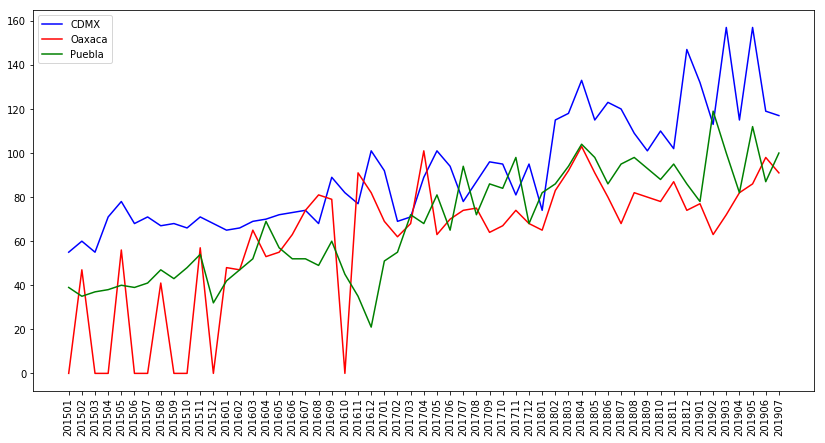

In [12]:
plt.figure(figsize=(14,7))
plt.plot(range(len(hom_cdmx.aniomes)), hom_cdmx.frecuencia,'b-' ,label="CDMX" )
plt.plot(range(len(hom_oax.aniomes)), hom_oax.frecuencia,'r-' ,label="Oaxaca" )
plt.plot(range(len(hom_pue.aniomes)), hom_pue.frecuencia,'g-' ,label="Puebla" )
plt.xticks(range(len(hom_cdmx.aniomes)), hom_cdmx.aniomes, rotation=90)
plt.legend(loc='best')
plt.show()

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

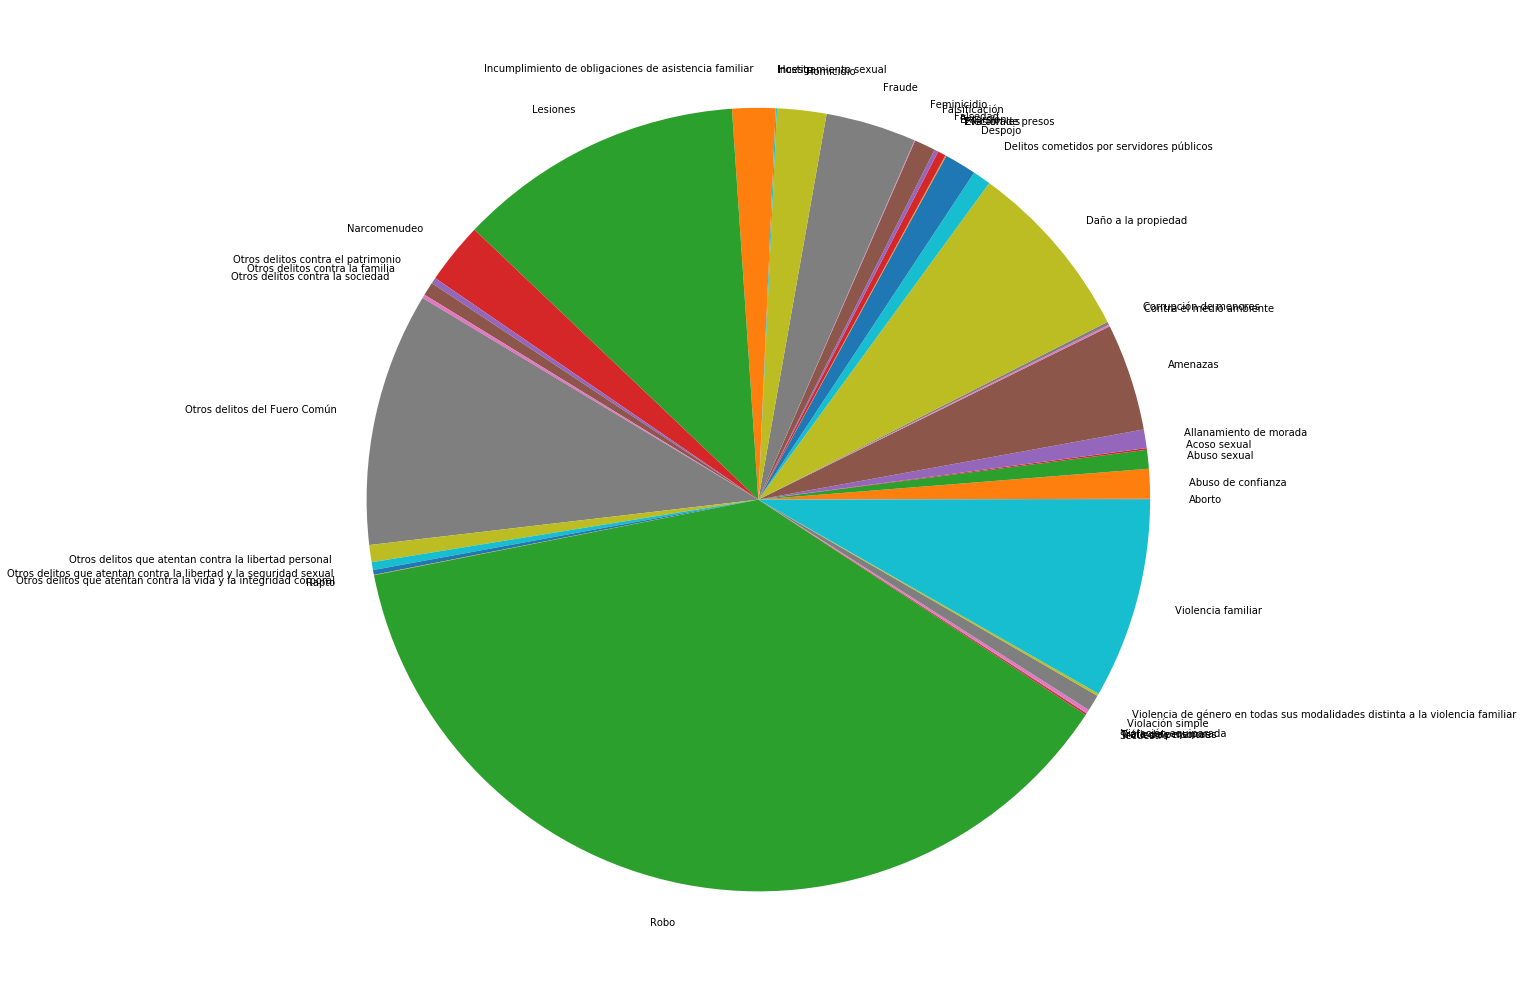

In [13]:
df3 = df.groupby(['anio', 'tipo_delito']).agg({'frecuencia':'sum'}).reset_index()
plt.figure(figsize=(14,14))
plt.pie(df3[df3.anio == 2015].frecuencia, labels=df3[df3.anio == 2015].tipo_delito)
plt.tight_layout()
plt.show()

---
## Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

### Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

---

In [20]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


,Unnamed: 0,Cve_Entidad,Entidad,Poblacion
0,0,1,Aguascalientes,1312544.0
1,1,2,Baja California,3315766.0
2,2,3,Baja California Sur,712029.0
3,3,4,Campeche,899931.0
4,4,5,Coahuila de Zaragoza,5217908.0


In [29]:
df3 = df.groupby(['anio', 'tipo_delito']).agg({'frecuencia':'sum'}).reset_index()
df3.groupby(['tipo_delito']).agg({'frecuencia':'sum'}).reset_index().sort_values(['frecuencia']).tipo_delito.values

array(['Incesto', 'Tráfico de menores', 'Evasión de presos', 'Rapto',
       'Trata de personas', 'Aborto', 'Feminicidio', 'Electorales',
       'Hostigamiento sexual', 'Secuestro', 'Contra el medio ambiente',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Corrupción de menores', 'Acoso sexual', 'Violación equiparada',
       'Falsedad', 'Otros delitos contra la sociedad',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Extorsión', 'Otros delitos contra el patrimonio',
       'Otros delitos contra la familia', 'Violación simple',
       'Allanamiento de morada',
       'Otros delitos que atentan contra la libertad personal',
       'Delitos cometidos por servidores públicos', 'Abuso sexual',
       'Falsificación', 'Abuso de confianza', 'Despojo',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Homicidi